<a href="https://colab.research.google.com/github/hodoosol/ML_DL_OnMyOwn/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_Chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 회귀 알고리즘과 모델 규제
## 1) k- 최근접 이웃 회귀


농어의 무게를 예측하라

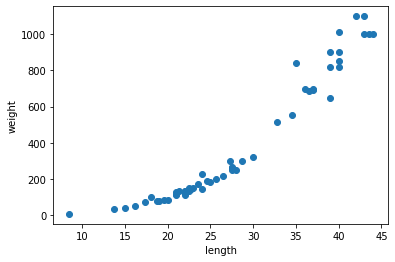

In [ ]:
# 농어 데이터 입력받기
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트 준비
# perch_weight가 target값이 된다. 즉, 농어의 길이로 무게를 예측하는 모델이다.
from sklearn.model_selection import train_test_split
# train - test 나누기, 값 지정 안해주면 0.75 / 0.25로 나누어진다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 하기 때문에 reshape 해준다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

회귀 모델 훈련

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)
# R^2의 값을 출력한다.

0.9928094061010639

In [ ]:
# 타깃과 예측이 얼마나 차이나는지 알아보자.
# mean_absolute_error()는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# + - 약 19g 정도 차이나는 것을 알 수 있다.

19.157142857142862


과대적합과 과소적합

In [ ]:
knr.score(test_input, test_target)

0.9698823289099255

In [ ]:
knr.score(train_input, train_target)

0.9698823289099255

보통은 훈련세트가 테스트세트보다 높지만 이 경우엔 아니다.
이것을 과소적합이라 한다.

반대로 훈련세트가 테스트세트보다 현저히 높다면 과대적합되었다고 한다. 이 문제를 해결해보자.

In [ ]:
# 어떻게 ? 모델을 좀 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 된다.
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [ ]:
# 성공 !
knr.score(test_input, test_target)

0.974645996398761

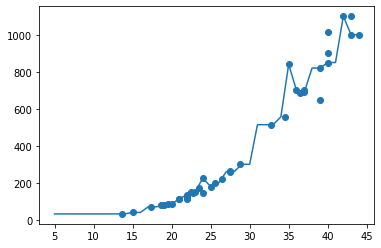

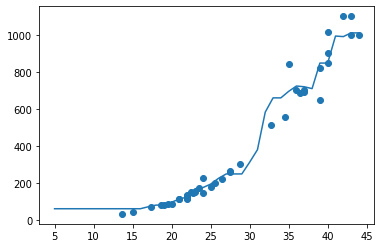

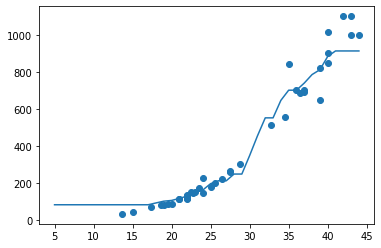

In [ ]:
# test 2번
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)
for n in[1, 5, 10] :
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.show()

## 2) 선형 회귀

아주 큰 농어

In [ ]:
# 농어 데이터 입력받기
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# train - test 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 최근접 이웃 개수를 3으로 하는 모델을 훈련한다.
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 길이가 50cm인 농어의 무게를 예측해본다.
knr.predict([[50]])

array([1033.33333333])

모델은 1033g 정도로 예측했다. 그러나 실제 이 농어의 무게는 훨씬 더 많이 나간다고 한다. 해결해보자. 

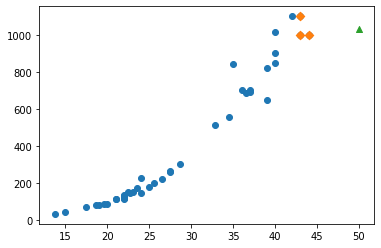

In [ ]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트의 산점도를 구한다.
plt.scatter(train_input, train_target)
# 훈련 세트 중 거대한 농어의 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 거대한 농어만 다시 그리기.
plt.scatter(50, 1033, marker='^')

plt.show()

k-최근접 이웃은 훈련세트의 값만을 기준으로 하기 때문에 훈련세트의 범위 바깥에 있는 샘플을 예측하기 어렵다 !!

이러한 k-최근접 이웃의 한계를 해결할 수 있는 선형 회귀 알고리즘을 알아보자.

### 선형 회귀(Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
# 클래스 부르기
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 거대 농어에 대한 예측
lr.predict([[50]])


array([1241.83860323])

In [ ]:
# 선형 회귀 모델의 기울기와 y 절편 출력하기
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


학습한 직선 그리기

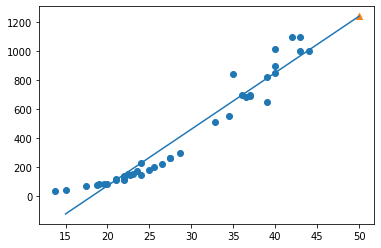

0.9398463339976039
0.8247503123313558


In [ ]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_,  50 * lr.coef_ + lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

훈련 세트와 테스트 세트가 꽤 차이남(과대적합)
또, 훈련 세트의 점수 자체도 높지 않음(전체적으로 과소적합)


마지막으로 작은 농어의 예측 무게가 음수로 떨어지는 것을 알수 있다. 해결해 보자.

### 다항 회귀

농어의 무게 = a(농어의 길이)^2 + b(농어의 길이) + c

농어의 길이를 제곱하여 훈련 세트에 추가해 주자.

In [ ]:
# 1차원 배열을 열 방향으로 나란히 붙이기 = np.column_stack
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [ ]:
# 모델 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)
# [[길이의 제곱, 길이]]로 거대한 농어 예측하기
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


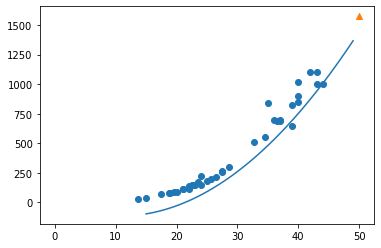

0.9706807451768623
0.9775935108325122


In [ ]:
# 학습한 직선 그리기
# 구간별 직선을 그리기 위해 15에서 49까지 정수배열 만들기
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기.
plt.plot(point, 1.01*point**2 - 21.6*point, +116.05)
# 거대 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

농어의 특성이 지금은 길이 1개뿐이라 선형 회귀의 그래프를 2차원으로 표현할 수 있지만 특성이 늘어나면 그래프로 확인하긴 힘들기 때문에 스코어만 보고 판단하는 경우가 많다.

## 3) 특성 공학과 규제

### 다중 회귀(multiple regression / multinomial regression)

농어의 길이, 농어의 높이, 농어의 두께 : 세 개의 특성 사용

In [ ]:
# 농어 데이터 입력 받기
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
# 타겟 데이터 입력받기
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# PolynomialFeatures 알아보기
from sklearn.preprocessing import PolynomialFeatures

# degree = 2   ->   제곱하기
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

# PolynomialFeatures는 실제로 무언가를 학습하는 것은 아니고,
# n개의 특성을 다항 특성으로 만드려면 몇 개의 특성이 필요한지 파악하는 용도

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 농어의 훈련 데이터에 적용해보자.
# 객체 생성, 맨 앞에 나오는 절편을 위한 항(1) 없애기
poly = PolynomialFeatures(include_bias=False)
# 특성 공학 - 훈련 세트의 새로운 특성 만들기
poly.fit(train_input)
train_poly = poly.transform(train_input)
# 훈련 세트의 모양 출력하기
print(train_poly.shape)
# 훈련 세트의 특성 이름들 출력하기 - x0 = 농어의 길이 x1 = 농어의 높이 x2 = 농어의 두께 
print(poly.get_feature_names())

# 테스트 세트도 적용하기 - 새로운 poly 객체 생성하지는 않고, 훈련 세트의 객체를 그대로 사용하는 것이 좋다.
# Q1. 위 주석은 셋째줄에서 생성한 poly = PolynomialFeatures(include_bias=False)의 poly를
# train_input에서 사용한 뒤, test_input에서도 그대로 사용한다는 말이 맞나요 ?
# 테스트 세트에서는 자체적으로 fit을 호출한다 ??
test_poly = poly.transform(test_input)

from sklearn.linear_model import LinearRegression
# 선형 회귀 객체 생성
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
0.9903183436982124
0.9714559911594132


더 많은 특성 만들기

In [ ]:
# 특성을 5제곱까지 만들어보자.
poly = PolynomialFeatures(degree = 5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 출력해보면, 훈련세트에서는 0.9999999999 테스트세트에서는 -144.4의 결과가 나온다.
# 특성을 55개나 만들어서 굉장히 과대적합 되었다...
# 과제적합을 줄여보도록 하자. -> 규제

(42, 55)
0.9999999999991096
-144.40579242335605


### 규제

규제 전에 표준화

In [ ]:
# 특성의 스케일을 조정해주자 ex)z점수(표준점수)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

# 마찬가지로 여기에서도, 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 함.
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지 회귀 - 가중치^2을 기준으로 규제 (L2 규제)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절할 수 있다. - 디폴트는 1
# alpha의 값이 크면 규제 강도가 세지므로 좀 더 과소적합되도록 유도한다.
# alpha의 값이 작으면 선형 회귀모델과 유사해지므로 과대적합될 가능성이 크다.
# alpha 처럼 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 한다.

0.9896101671037343
0.9790693977615398


적절한 규제 강도 찾기

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

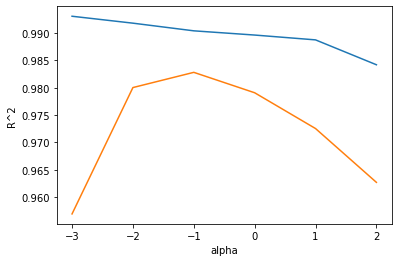

In [ ]:
# 0.001, 0.01, 0.1, 1 구간이 너무 촘촘해 그래프를 보기 어려우니
# log10 해줘서 x축의 스케일을 고르게 해준다. 
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 10^-1인 alpha = 0.1인 구간이 가장 적절하다
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


라쏘 회귀 - 계수의 절댓값을 기준으로 규제(L1 규제)

In [ ]:
# 라쏘 회귀 훈련하기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


라쏘의 적절한 alpha값 찾기

In [ ]:
# 마찬가지로 라쏘의 적절한 규제강도를 찾아보자
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


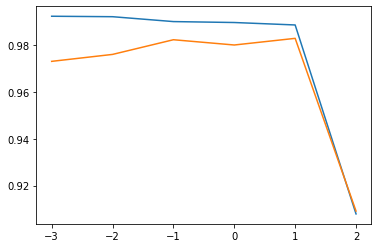

In [ ]:
# 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
# alpha = 1일 때 가장 좋네.

In [ ]:
# alpha = 1로 다시 훈련하기
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
40


In [ ]:
# 라쏘에서는 가중치를 아예 0으로 설정할 수 있다. 그 개수를 세어보자.
print(np.sum(lasso.coef_ == 0))

# 총 55개의 특성중 라쏘 모델이 사용한 특성은 15개이다.
# 이런 특징 때문에 라쏘 모델을 이용해 유용한 특성을 골라내기도 한다.

40
